<a href="https://colab.research.google.com/github/blachat123/Balsamiq/blob/main/trained_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
brsdincer_vehicle_detection_image_set_path = kagglehub.dataset_download('brsdincer/vehicle-detection-image-set')

print('Data source import complete.')

# Get the path to the downloaded data
data_dir = os.path.join(brsdincer_vehicle_detection_image_set_path, 'data')

100%|██████████| 119M/119M [00:03<00:00, 32.4MB/s]

Extracting files...


Data source import complete.


In [ ]:
data_dir = os.path.join(brsdincer_vehicle_detection_image_set_path, 'data')

In [ ]:
# Load the dataset with a validation split
train_dataset = image_dataset_from_directory(
    data_dir,
    seed=123,
    labels='inferred',
    subset='training',
    validation_split=0.2,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=350
)

test_dataset = image_dataset_from_directory(
    data_dir,
    seed=123,
    labels='inferred',
    subset='validation',
    validation_split=0.2,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=350
)

Found 17760 files belonging to 2 classes.
Using 14208 files for training.
Found 17760 files belonging to 2 classes.
Using 3552 files for validation.


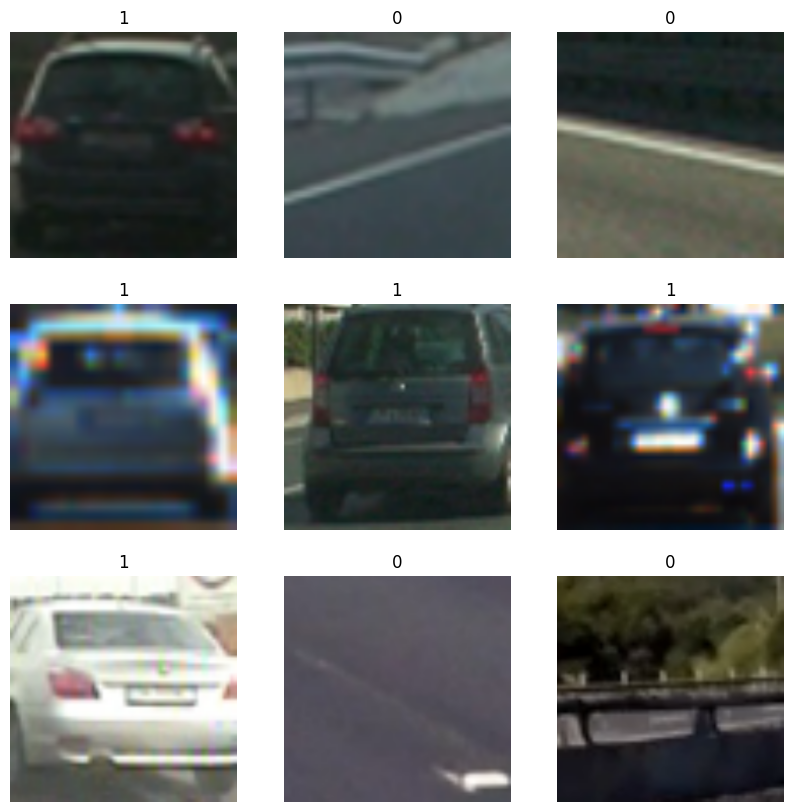

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")

display_images(train_dataset)

In [ ]:
# Create a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')  # Number of classes should be 2 for this dataset
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,# Adjust the number of epochs as needed
    steps_per_epoch=10,
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 532s 55s/step - accuracy: 0.5661 - loss: 1.8879 - val_accuracy: 0.8564 - val_loss: 0.5456
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 548s 56s/step - accuracy: 0.8375 - loss: 0.4730 - val_accuracy: 0.8612 - val_loss: 0.3336
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 550s 56s/step - accuracy: 0.8824 - loss: 0.2856 - val_accuracy: 0.9245 - val_loss: 0.2040
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 545s 56s/step - accuracy: 0.9192 - loss: 0.2092 - val_accuracy: 0.9479 - val_loss: 0.1415
Epoch 5/10
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3:39 24s/step - accuracy: 0.9760 - loss: 0.1132

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 166s 16s/step - accuracy: 0.9760 - loss: 0.1132 - val_accuracy: 0.9561 - val_loss: 0.1361
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 555s 55s/step - accuracy: 0.9499 - loss: 0.1454 - val_accuracy: 0.9611 - val_loss: 0.1023
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 543s 56s/step - accuracy: 0.9638 - loss: 0.0963 - val_accuracy: 0.9749 - val_loss: 0.0827
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 531s 54s/step - accuracy: 0.9683 - loss: 0.0847 - val_accuracy: 0.9733 - val_loss: 0.0839
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 548s 56s/step - accuracy: 0.9784 - loss: 0.0633 - val_accuracy: 0.9792 - val_loss: 0.0574
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 155s 15s/step - accuracy: 0.9904 - loss: 0.0514 - val_accuracy: 0.9794 - val_loss: 0.0607


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 11s/step - accuracy: 0.9802 - loss: 0.0587
Test Loss: 0.06067046523094177, Test Accuracy: 0.9794481992721558


In [ ]:
model.save('/content/drive/MyDrive/my_model2.h5')

11/11 ━━━━━━━━━━━━━━━━━━━━ 144s 12s/step


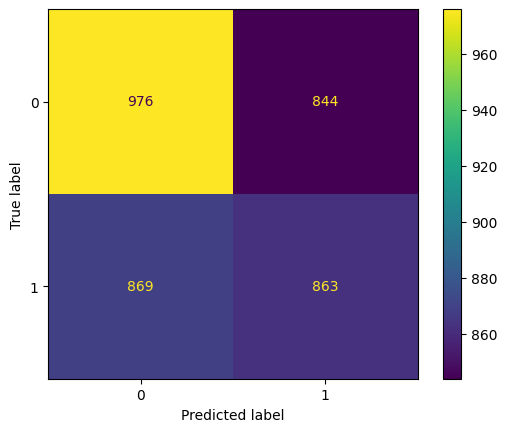

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(model.predict(test_dataset), axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()


11/11 ━━━━━━━━━━━━━━━━━━━━ 133s 12s/step


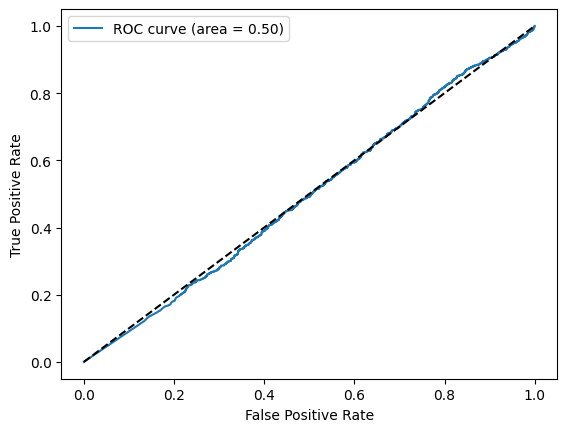

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict(test_dataset)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

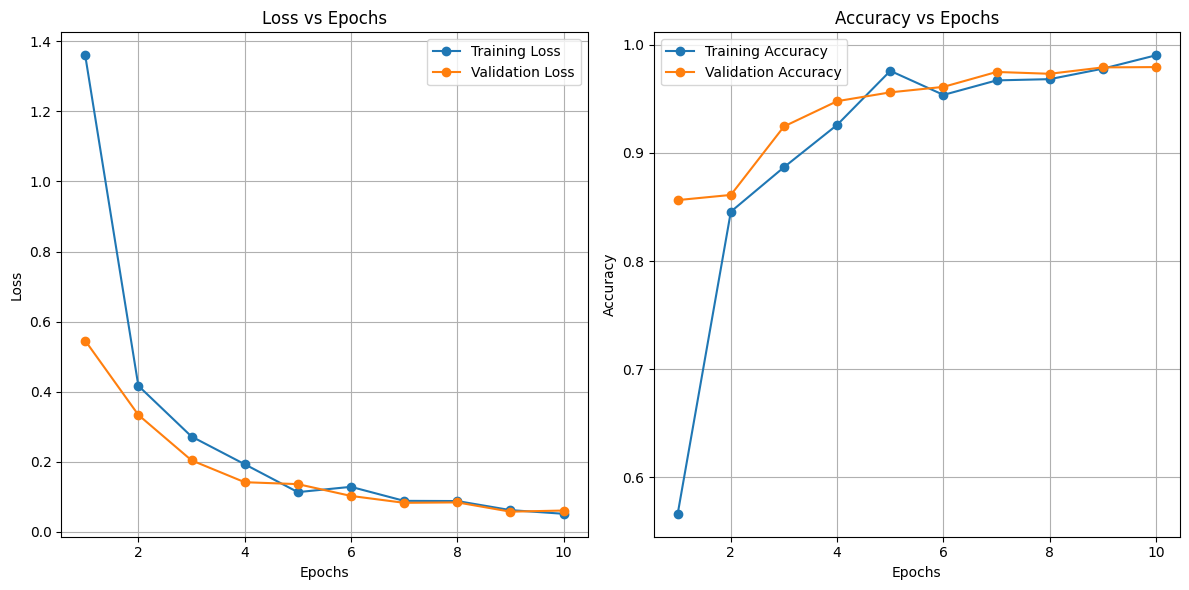

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is your training history object
# Replace 'history' with the variable name used in your code

# Extract data from the history object
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step


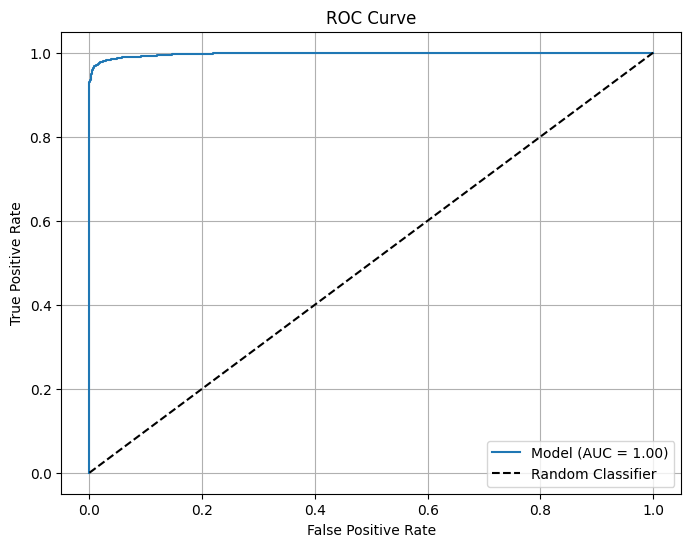

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import numpy as np

# Step 1: Get the predicted probabilities for the test dataset
# We need to make predictions and get probabilities (not the class predictions)
y_true = []
y_pred_probs = []

# Iterate through the test dataset and collect the true labels and predicted probabilities
for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # True labels (0 or 1)
    y_pred_probs.extend(model.predict(images))  # Predicted probabilities

# Convert lists to numpy arrays for processing
y_true = np.array(y_true)
y_pred_probs = np.array([prob[1] for prob in y_pred_probs])  # Extract probabilities for the positive class (class 1)

# Step 2: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


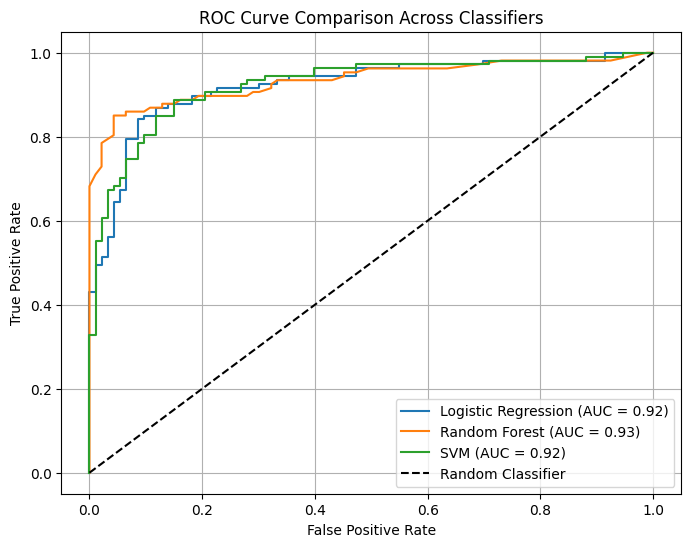

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import tensorflow as tf
import numpy as np

# Simulate a classification dataset (you can replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # SVM with probability estimates
}

# Plot ROC curve for each classifier
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the classifier
    y_pred_probs = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Classifiers')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get the true labels and predicted labels
y_true = []
y_pred = []

# Loop through the test dataset to collect true labels and predicted labels
for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # True labels (0 or 1)
    y_pred_probs = model.predict(images)  # Get predicted probabilities
    # Change: Get the class with the highest probability instead of thresholding directly
    y_pred.extend(np.argmax(y_pred_probs, axis=1))  # Predicted class labels (0 or 1)

# Convert lists to numpy arrays for processing
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 983ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 981ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 922ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1820
           1       0.99      0.97      0.98      1732

    accuracy                           0.98      3552
   macro avg       0.98      0.98      0.98      3552
weighted avg       0.98      0.98      0.98      3552

Confusion Matrix:
[[1796   24]
 [  49 1683]]


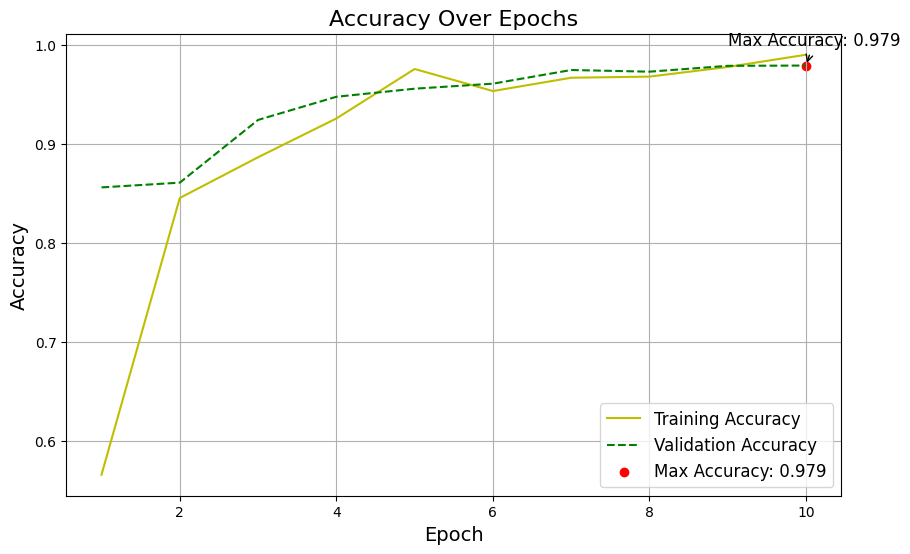

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a saved `history` object from training
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'y-', label='Training Accuracy')  # Yellow solid line
plt.plot(epochs, validation_accuracy, 'g--', label='Validation Accuracy')  # Green dashed line

# Highlight max validation accuracy
max_val_acc_epoch = validation_accuracy.index(max(validation_accuracy)) + 1
plt.scatter(max_val_acc_epoch, max(validation_accuracy), color='red', label=f'Max Accuracy: {max(validation_accuracy):.3f}')

# Annotate
plt.annotate(f'Max Accuracy: {max(validation_accuracy):.3f}',
             xy=(max_val_acc_epoch, max(validation_accuracy)),
             xytext=(max_val_acc_epoch - 1, max(validation_accuracy) + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Labels, title, and legend
plt.title('Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Detected Vehicle: Car


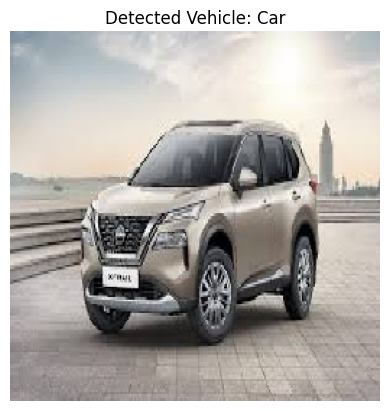

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/my_model2.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/car.jpg'
img = image.load_img(img_path, target_size=(256, 256))  # Adjust target_size to your model's input size
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model
predictions = model.predict(img_array)

# For classification models
class_labels = ['Car', 'Truck', 'Bike', 'Bus']  # Replace with your actual class labels
predicted_class = class_labels[np.argmax(predictions)]
print(f"Detected Vehicle: {predicted_class}")

# Display the resized image
plt.imshow(image.array_to_img(img_array[0]))  # Display the preprocessed image
plt.title(f"Detected Vehicle: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
pip install ultralytics tracker

In [ ]:
pip install ultralytics tracker

In [ ]:
import cv2

In [ ]:
import os
import math

class Tracker:
    def __init__(self):
        # Store the center positions of the objects
        self.center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.id_count = 0


    def update(self, objects_rect):
        # Objects boxes and ids
        objects_bbs_ids = []

        # Get center point of new object
        for rect in objects_rect:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Find out if that object was detected already
            same_object_detected = False
            for id, pt in self.center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 35:
                    self.center_points[id] = (cx, cy)
#                    print(self.center_points)
                    objects_bbs_ids.append([x, y, w, h, id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.center_points[self.id_count] = (cx, cy)
                objects_bbs_ids.append([x, y, w, h, self.id_count])
                self.id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_center_points = {}
        for obj_bb_id in objects_bbs_ids:
            _, _, _, _, object_id = obj_bb_id
            center = self.center_points[object_id]
            new_center_points[object_id] = center

        # Update dictionary with IDs not used removed
        self.center_points = new_center_points.copy()
        return objects_bbs_ids
tracker=Tracker()
down = {}
up = {}
counter_down = []
counter_up = []

red_line_y = 198
blue_line_y = 268
offset = 6

# Create a folder to save frames
if not os.path.exists('detected_frames'):
    os.makedirs('detected_frames')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (1020, 500))

In [ ]:
import math
import cv2
import os
import pandas as pd
from ultralytics import YOLO
from tracker import *
import time

# Define class list (same as previous)
class_list = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Initialize video and model
cap = cv2.VideoCapture('/content/highway.mp4')  # Path to your uploaded video
model = YOLO('yolov8s.pt')  # Load YOLOv8 model
tracker = Tracker()  # Initialize tracker
count = 0

# Detection configurations
down = {}
counter_down = []
red_line_y = 198
blue_line_y = 268
offset = 6

# Store speeds for each detected object
speeds = {}  # Dictionary to store speeds of objects

# Create a folder to save frames
if not os.path.exists('detected_frames'):
    os.makedirs('detected_frames')

# Video writer setup
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('vehicledetect.avi', fourcc, 20.0, (1020, 500))

# Process video
while True:
    ret, frame = cap.read()
    if not ret:
        break
    count += 1
    frame = cv2.resize(frame, (1020, 500))

    # YOLO object detection
    results = model.predict(frame, conf=0.25)  # Lower confidence threshold for better detection
    detections = results[0].boxes.data if results[0].boxes else []
    detections = detections.detach().cpu().numpy()  # Convert to numpy array
    px = pd.DataFrame(detections).astype("float")  # Create DataFrame for processing
    list = []

    for index, row in px.iterrows():
        x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])
        conf = float(row[4])  # Confidence score
        class_id = int(row[5])  # Class ID
        if class_id < len(class_list):  # Ensure valid class ID
            label = class_list[class_id]  # Get class name from ID
            # Draw bounding box with color (cyan for cars, magenta for trucks)
            color = (255, 0, 255) if label == 'truck' else (255, 255, 0)  # Cyan for cars, Magenta for trucks
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)
            cv2.putText(
                frame,
                f'{label} {conf:.2f}',  # Shows the label and confidence score
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                (255, 255, 255),  # White text color
                2,
                cv2.LINE_AA,
            )
            # Collect object bounding boxes for tracking
            list.append([x1, y1, x2, y2])

    # Update tracker
    bbox_id = tracker.update(list)
    for bbox in bbox_id:
        x3, y3, x4, y4, id = bbox
        cx = int((x3 + x4) // 2)
        cy = int((y3 + y4) // 2)

        # Check for crossing the red line (going down)
        if red_line_y < (cy + offset) and red_line_y > (cy - offset):
            down[id] = time.time()
        if id in down:
            if blue_line_y < (cy + offset) and blue_line_y > (cy - offset):
                elapsed_time = time.time() - down[id]
                if counter_down.count(id) == 0:
                    counter_down.append(id)
                    distance = 10  # meters
                    a_speed_ms = distance / elapsed_time
                    a_speed_kh = a_speed_ms * 3.6
                    speeds[id] = int(a_speed_kh)  # Store speed in the dictionary

                    # Display speed continuously while the vehicle is moving
                    if id in speeds:
                        cv2.putText(
                            frame,
                            f"{speeds[id]} Km/h",
                            (x3 - 60, y3),  # Position left of the bounding box
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0,
                            (0, 255, 255),  # Bright yellow text for speed
                            3,
                        )
                        cv2.putText(
                            frame,
                            f"{speeds[id]} Km/h",
                            (x4 + 10, y3),  # Position right of the bounding box
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0,
                            (0, 255, 255),  # Bright yellow text for speed
                            3,
                        )

    # Save detected frame
    cv2.imwrite(f'detected_frames/frame_{count}.jpg', frame)
    out.write(frame)

# Release resources
cap.release()
out.release()
print("Processing completed!")



0: 320x640 8 cars, 2 trucks, 369.8ms
Speed: 3.7ms preprocess, 369.8ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 8 cars, 2 trucks, 351.4ms
Speed: 3.6ms preprocess, 351.4ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 7 cars, 2 trucks, 378.1ms
Speed: 4.3ms preprocess, 378.1ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 6 cars, 2 trucks, 343.6ms
Speed: 3.3ms preprocess, 343.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 8 cars, 2 trucks, 357.9ms
Speed: 5.1ms preprocess, 357.9ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 8 cars, 2 trucks, 373.4ms
Speed: 3.5ms preprocess, 373.4ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 8 cars, 2 trucks, 338.8ms
Speed: 3.1ms preprocess, 338.8ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 8 cars, 2 trucks, 353.4ms
Speed: 3.0